In [34]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.model_selection import train_test_split

In [6]:
path = ('brain-tumor-detection-master/brain_tumor/Training')

In [23]:
properties = []
y = []

In [24]:
for folder in os.listdir(path):
    file_path = (path+'/'+folder)
    label = 0
    if folder != "no_tumor":
        label=1
    for file in os.listdir(file_path):
        img_path = (file_path+'/'+file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(100,100))
        img = img/255
        properties.append(img)
        y.append(label)
        

In [25]:
len(y)

1222

In [26]:
len([i for i in y if i==1])

827

In [27]:
len([i for i in y if i==0])

395

In [28]:
len(properties)

1222

In [30]:
properties[0].shape

(100, 100, 3)

In [35]:
properties = np.array(properties)

In [36]:
y = np.array(y)

In [39]:
features = properties.reshape(len(properties),-1)

In [40]:
features.shape

(1222, 30000)

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y, random_state=10,test_size=.20)

In [44]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((977, 30000), (245, 30000), (977,), (245,))

In [45]:
from sklearn.decomposition import PCA

In [46]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(977, 30000) (245, 30000)


In [ ]:
pca_test

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [50]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [51]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9551020408163265


In [55]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

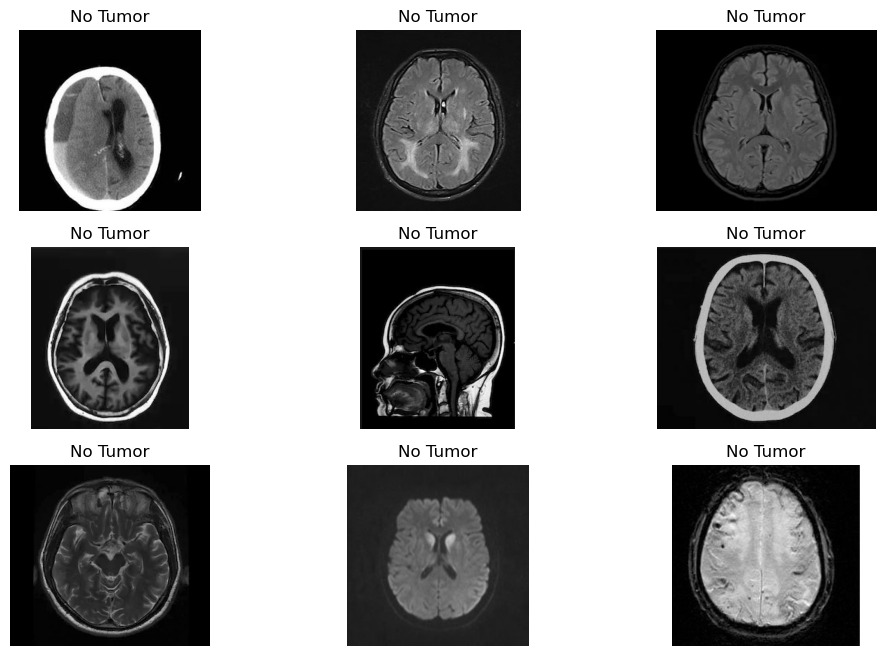

In [56]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i)
    img1 = cv2.resize(img, (100,100))
    img1 = img1.reshape(1,-1)/255
    img1 = pca.transform(img1)
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

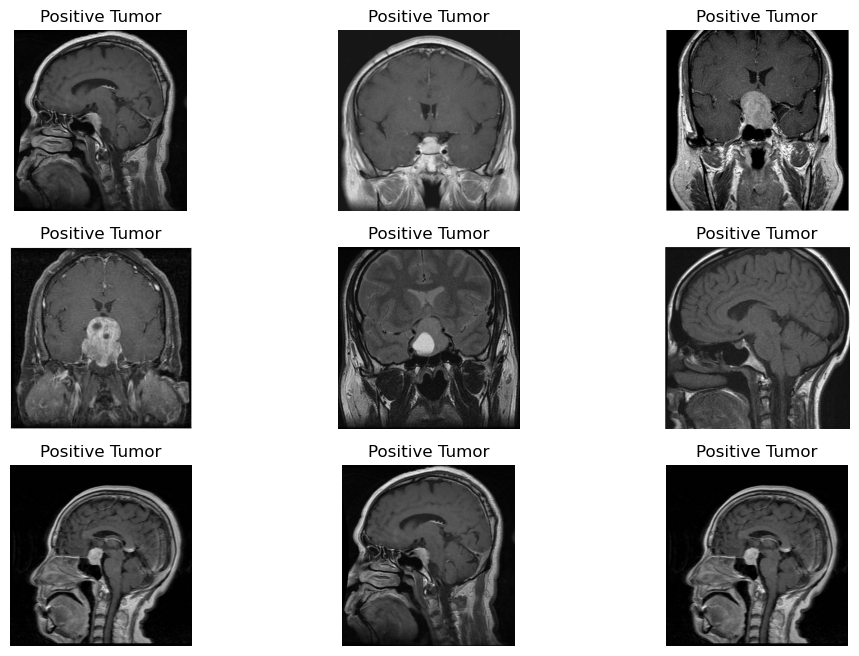

In [57]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i)
    img1 = cv2.resize(img, (100,100))
    img1 = img1.reshape(1,-1)/255
    img1 = pca.transform(img1)
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1